# Basic Convolutional Neural Networks (CNN)
- Objective: create basic CNN models with Keras

<img src="https://adeshpande3.github.io/assets/Cover.png" style="width: 800px"/>

<br>
- Fundamental CNN structures: CNNs are similar to MLPs since they only feed signals forward (feedforward nets), but have different kind of layers unique to CNNs
    - ** Convolutional layer** : process data in a small receptive field (i.e., filter)
    - ** Pooling layer** : downsample along 2 dimensions (usually width and height) 
    - ** Dense (fully connected) layer** : similar to hidden layers of MLPs

<img src="http://cs231n.github.io/assets/cnn/convnet.jpeg" style="width: 600px"/>
<br>
<center> **ConvNet architecture** </center>

In [57]:
# import dataset, model and layers  
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

batch_size = 128
num_classes = 10
epochs = 5


# input image dimensions
img_rows, img_cols = 28, 28

### Load Datset
- From Keras data repository

In [58]:
# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


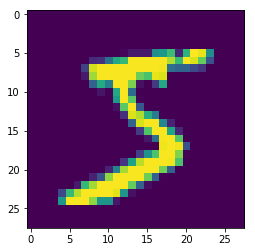

label:  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [59]:
import numpy as np
import matplotlib.pyplot as plt

plt.imshow(np.squeeze(x_train[0]))    # show first number in the dataset
plt.show()
print('label: ', y_train[0])    # label = '0'

### Defince the model

In [62]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='sigmoid'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation = 'sigmoid'))
model.add(Dense(num_classes, activation='softmax'))

In [63]:
### show model summary
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_11 (Dense)             (None, 128)               1179776   
_________________________________________________________________
dense_12 (Dense)             (None, 10)                1290      
Total params: 1,199,882
Trainable params: 1,199,882
Non-trainable params: 0
_________________________________________________________________


### 2. Convolutional Layer
- In general, 2D convolutional layer is used for image processing
    - Size of filter (designated by 'kernel_size' parameter) defines **width and height of receptive field **
    - Number of filters (designated by 'filters' parameter) is equal to **depth of the next layer**
    - Strides (designated by 'strides' parameter) is** how far a filter makes change in its position** for each move
    - Image can be **zero-padded** in order to prevent getting too small (designated by 'padding' parameter)
- Doc: https://keras.io/layers/convolutional/
<img src="http://cs231n.github.io/assets/cnn/depthcol.jpeg" style="width: 400px"/>

### 3. Activation Layer
- Identical to the activation layers in MLP
- In general, relu is used as well
- Doc: http://cs231n.github.io/assets/cnn/depthcol.jpeg

### 4. Pooling layer
- In general, max pooling method is used
- Reduces number of parameters
- Doc: https://keras.io/layers/pooling/
<img src="http://cs231n.github.io/assets/cnn/maxpool.jpeg" style="width: 600px"/>

### 5. Dense (fully connected layer)
- Convolutional & pooling layers can be connected to dense layers
- Sometimes, dense layers can be omitted
- Doc: https://keras.io/layers/core/

### Compile the model

In [64]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

### Run the model

In [65]:
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 84s 1ms/step - loss: 2.0983 - acc: 0.2125 - val_loss: 0.6164 - val_acc: 0.8138
Epoch 2/5
60000/60000 [==============================] - 84s 1ms/step - loss: 0.3025 - acc: 0.9148 - val_loss: 0.1919 - val_acc: 0.9462
Epoch 3/5
60000/60000 [==============================] - 84s 1ms/step - loss: 0.1451 - acc: 0.9583 - val_loss: 0.1085 - val_acc: 0.9662
Epoch 4/5
60000/60000 [==============================] - 83s 1ms/step - loss: 0.0926 - acc: 0.9738 - val_loss: 0.0787 - val_acc: 0.9773
Epoch 5/5
60000/60000 [==============================] - 84s 1ms/step - loss: 0.0678 - acc: 0.9806 - val_loss: 0.0616 - val_acc: 0.9806


### Test model 

In [66]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.06158030740506947
Test accuracy: 0.9806
